## 과제 2: 영화 평점과 흥행 수익 간의 상관관계 분석
사용자 평점, 비평가 평점, 박스오피스 수익 간의 관계를 분석하고, 평점이 높지만 흥행하지 못한 영화와 평점은 낮지만 흥행한 영화들의 특성을 비교 분석하세요.

데이터를 성공적으로 불러왔습니다.
결측값 제거 후 총 666개의 데이터가 남았습니다.

네이버 사용자 평점과 흥행 수익 순위의 상관계수: -0.26
네이버 비평가 평점과 흥행 수익 순위의 상관계수: -0.19

--- 평점은 높지만 흥행 수익이 낮은 영화 목록 ---


,title,vote_average_naver,revenue,audience_total
292,세상에서 가장 아름다운 이별,9.281,1.873710e+09,256549.0
387,파이스토리 : 악당상어 소탕작전,8.691,1.692333e+09,248260.0
447,한공주,8.871,1.675374e+09,211094.0
615,공범자들,8.961,1.634900e+09,206599.0
299,마마,8.421,1.474475e+09,213591.0
47,국경의 남쪽,8.491,1.424213e+09,226133.0
574,"무현, 두 도시 이야기",8.331,1.371983e+09,174356.0
249,시,8.981,1.342564e+09,187643.0
639,1급기밀,8.891,1.333326e+09,164380.0
540,순정,8.861,1.307815e+09,182958.0



--- 평점은 낮지만 흥행 수익이 높은 영화 목록 ---


,title,vote_average_naver,revenue,audience_total
509,베테랑,6.191,1.050585e+11,13397762.0
614,군함도,4.891,5.029171e+10,6554420.0
637,강철비,4.791,3.537056e+10,4436231.0
24,태풍,6.131,2.211469e+10,3456331.0
427,친구 2,6.201,2.175961e+10,2964798.0
650,곤지암,6.211,2.133222e+10,2662377.0
374,26년,6.451,2.064370e+10,2874554.0
58,한반도,6.371,2.037871e+10,3296716.0
647,조선명탐정: 흡혈괴마의 비밀,6.411,1.940739e+10,2386716.0
307,7광구,3.341,1.926371e+10,2225436.0


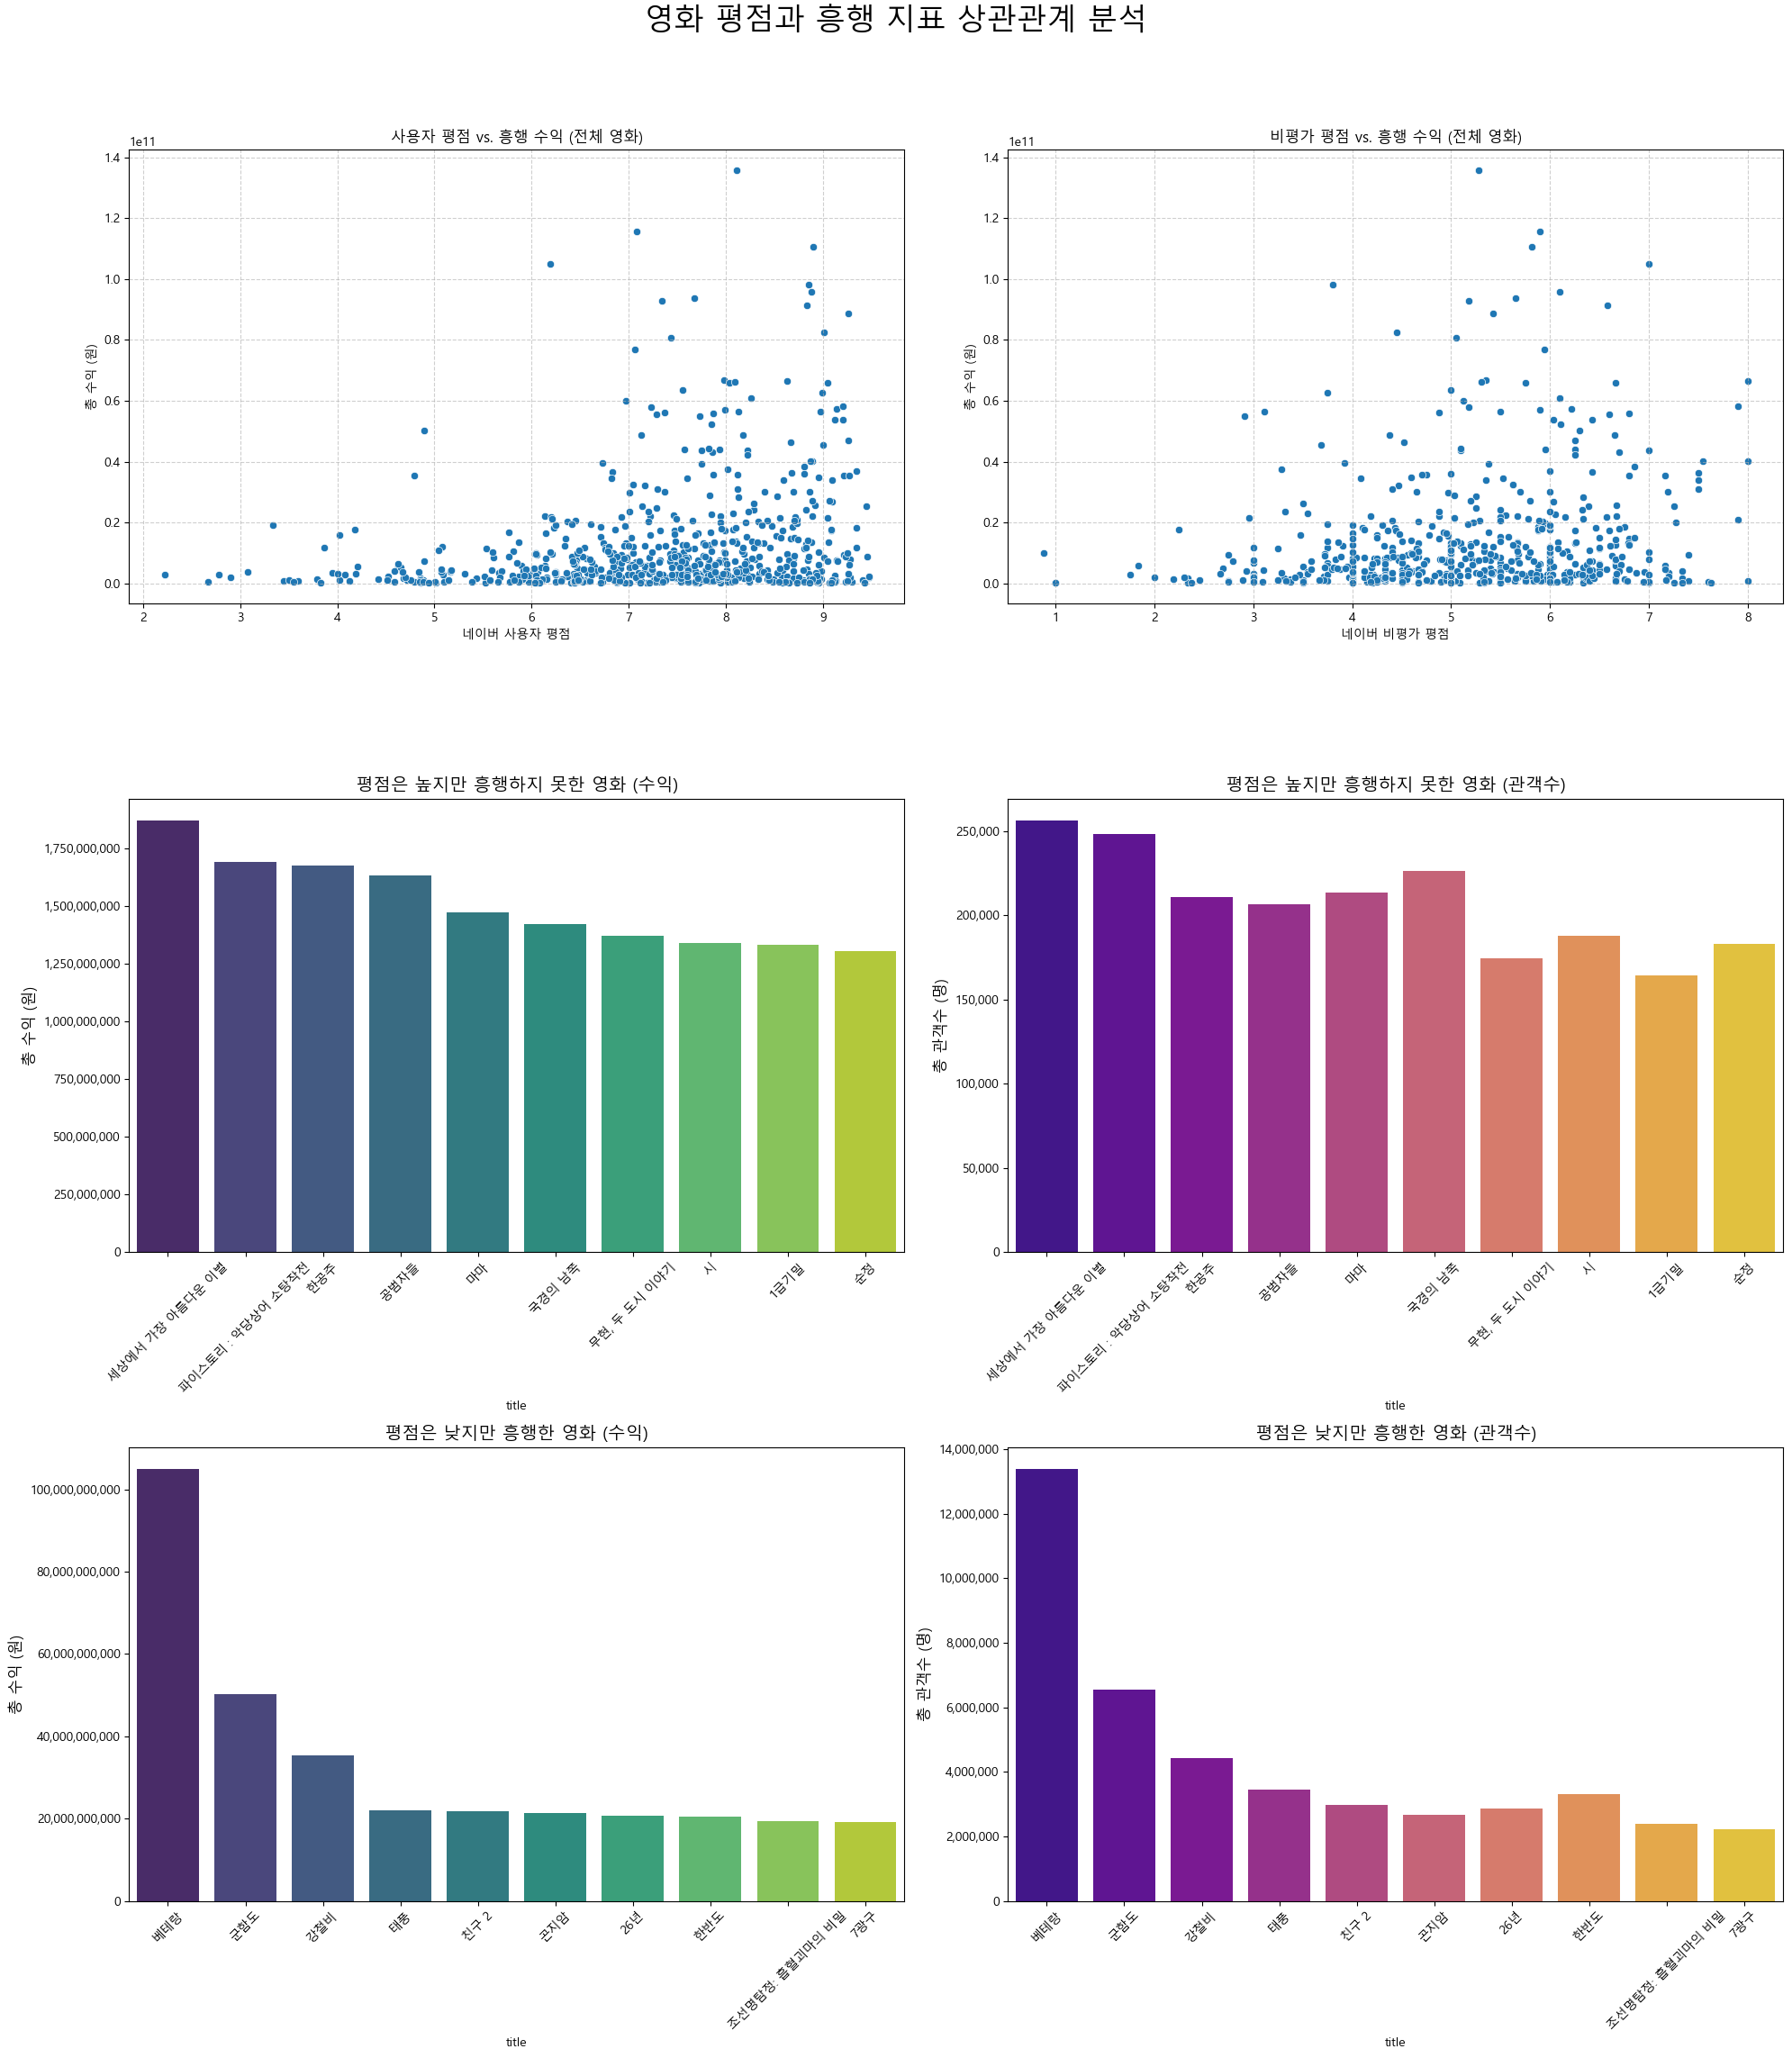


--- 평점은 높지만 흥행하지 못한 영화의 주요 장르 ---
genres
['드라마']      7
['다큐멘터리']    2
['애니메이션']    1
Name: count, dtype: int64

--- 평점은 낮지만 흥행한 영화의 주요 장르 ---
genres
['액션', '드라마']            4
['드라마', '액션']            2
['액션']                   1
['공포(호러)', '스릴러']        1
['사극', '어드벤처', '코미디']    1
Name: count, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import warnings
import ast

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore', category=UserWarning)

# 한글 깨짐 방지 및 마이너스 부호 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
# ==========================================================
file_path = 'data_processed/kobis_with_naver_ratings.csv'
try:
    df = pd.read_csv(file_path)
    print("데이터를 성공적으로 불러왔습니다.")
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

# 분석에 필요한 열만 선택
analysis_df = df[['title', 'revenue', 'audience_total', 'vote_average_naver', 'critic_average', 'genres']].copy()

# 평점, 수익, 관객수에 결측값이 있는 행 제거
analysis_df.dropna(subset=['vote_average_naver', 'critic_average', 'revenue', 'audience_total'], inplace=True)
analysis_df.reset_index(drop=True, inplace=True)
print(f"결측값 제거 후 총 {len(analysis_df)}개의 데이터가 남았습니다.")

# 2. 상관관계 분석
# ==========================================================
# 수익(revenue)을 기준으로 흥행 순위 매기기 (순위는 낮을수록 좋음)
analysis_df['rank_by_revenue'] = analysis_df['revenue'].rank(ascending=False, method='min')

# 평점과 수익 순위 간의 상관계수 계산
user_revenue_corr = analysis_df['vote_average_naver'].corr(analysis_df['rank_by_revenue'])
critic_revenue_corr = analysis_df['critic_average'].corr(analysis_df['rank_by_revenue'])

print(f"\n네이버 사용자 평점과 흥행 수익 순위의 상관계수: {user_revenue_corr:.2f}")
print(f"네이버 비평가 평점과 흥행 수익 순위의 상관계수: {critic_revenue_corr:.2f}")

# 3. 평점과 흥행 간 괴리가 있는 영화 추출
# ==========================================================
# 흥행 성공/실패 기준 (수익 상위 25%와 하위 25%)
revenue_q3 = analysis_df['revenue'].quantile(0.75)
revenue_q1 = analysis_df['revenue'].quantile(0.25)

# 평점은 높지만 흥행 수익이 낮은 영화 (수익 하위 25%)
high_rating_low_revenue = analysis_df[
    (analysis_df['vote_average_naver'] >= analysis_df['vote_average_naver'].quantile(0.75)) &
    (analysis_df['revenue'] <= revenue_q1)
].sort_values(by='revenue', ascending=False).head(10)

# 평점은 낮지만 흥행 수익이 높은 영화 (수익 상위 25%)
low_rating_high_revenue = analysis_df[
    (analysis_df['vote_average_naver'] <= analysis_df['vote_average_naver'].quantile(0.25)) &
    (analysis_df['revenue'] >= revenue_q3)
].sort_values(by='revenue', ascending=False).head(10)

print("\n--- 평점은 높지만 흥행 수익이 낮은 영화 목록 ---")
display(high_rating_low_revenue[['title', 'vote_average_naver', 'revenue', 'audience_total']])
print("\n--- 평점은 낮지만 흥행 수익이 높은 영화 목록 ---")
display(low_rating_high_revenue[['title', 'vote_average_naver', 'revenue', 'audience_total']])

# 4. 분석 결과 시각화
# ==========================================================
# 🚨 3행 2열로 서브플롯 구성하여 산점도 2개와 막대 그래프 4개를 배치
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 24))
fig.suptitle('영화 평점과 흥행 지표 상관관계 분석', fontsize=24, y=0.98)

# 사용자 평점 vs. 흥행 수익 산점도
sns.scatterplot(x='vote_average_naver', y='revenue', data=analysis_df, ax=axes[0, 0])
axes[0, 0].set_title('사용자 평점 vs. 흥행 수익 (전체 영화)')
axes[0, 0].set_xlabel('네이버 사용자 평점')
axes[0, 0].set_ylabel('총 수익 (원)')
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

# 비평가 평점 vs. 흥행 수익 산점도
sns.scatterplot(x='critic_average', y='revenue', data=analysis_df, ax=axes[0, 1])
axes[0, 1].set_title('비평가 평점 vs. 흥행 수익 (전체 영화)')
axes[0, 1].set_xlabel('네이버 비평가 평점')
axes[0, 1].set_ylabel('총 수익 (원)')
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

# 🚨 평점은 높지만 흥행하지 못한 영화: 수익 vs. 관객수
sns.barplot(x='title', y='revenue', data=high_rating_low_revenue, ax=axes[1, 0], palette='viridis', hue='title', legend=False)
axes[1, 0].set_title('평점은 높지만 흥행하지 못한 영화 (수익)', fontsize=14)
axes[1, 0].set_ylabel('총 수익 (원)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=10)
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

sns.barplot(x='title', y='audience_total', data=high_rating_low_revenue, ax=axes[1, 1], palette='plasma', hue='title', legend=False)
axes[1, 1].set_title('평점은 높지만 흥행하지 못한 영화 (관객수)', fontsize=14)
axes[1, 1].set_ylabel('총 관객수 (명)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# 🚨 평점은 낮지만 흥행한 영화: 수익 vs. 관객수
sns.barplot(x='title', y='revenue', data=low_rating_high_revenue, ax=axes[2, 0], palette='viridis', hue='title', legend=False)
axes[2, 0].set_title('평점은 낮지만 흥행한 영화 (수익)', fontsize=14)
axes[2, 0].set_ylabel('총 수익 (원)', fontsize=12)
axes[2, 0].tick_params(axis='x', rotation=45, labelsize=10)
axes[2, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

sns.barplot(x='title', y='audience_total', data=low_rating_high_revenue, ax=axes[2, 1], palette='plasma', hue='title', legend=False)
axes[2, 1].set_title('평점은 낮지만 흥행한 영화 (관객수)', fontsize=14)
axes[2, 1].set_ylabel('총 관객수 (명)', fontsize=12)
axes[2, 1].tick_params(axis='x', rotation=45, labelsize=10)
axes[2, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. 특성 비교 분석
# ==========================================================
print("\n--- 평점은 높지만 흥행하지 못한 영화의 주요 장르 ---")
if 'genres' in high_rating_low_revenue.columns:
    print(high_rating_low_revenue['genres'].value_counts().head(5))

print("\n--- 평점은 낮지만 흥행한 영화의 주요 장르 ---")
if 'genres' in low_rating_high_revenue.columns:
    print(low_rating_high_revenue['genres'].value_counts().head(5))